# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [46]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp *0.1,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e: 
        print("City not found. Skipping...")

        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | huarmey
Processing Record 3 of Set 1 | katsuura
Processing Record 4 of Set 1 | charlestown
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 10 of Set 1 | kendari
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | vestmannaeyjar
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | tevriz
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | urzhum
Processing Record 17 of Set 1 | palu
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | wattegama
Processing Record 22 of Set 1 | provideniya
Process

In [47]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [48]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,29.107,79,75,8.75,AU,1675316209
1,huarmey,-10.0681,-78.1522,29.483,82,100,2.56,PE,1675316209
2,katsuura,35.1333,140.3000,28.157,35,100,3.45,JP,1675316210
3,charlestown,-32.9500,151.6667,30.603,51,14,1.79,AU,1675315977
4,bluff,-46.6000,168.3333,29.317,79,92,1.89,NZ,1675316210


In [49]:
# Export the City_Data into a csv

output_data = "output_data/cities.csv"

city_data_df.to_csv(output_data, index_label="City_ID")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,29.107,79,75,8.75,AU,1675316209
1,huarmey,-10.0681,-78.1522,29.483,82,100,2.56,PE,1675316209
2,katsuura,35.1333,140.3000,28.157,35,100,3.45,JP,1675316210
3,charlestown,-32.9500,151.6667,30.603,51,14,1.79,AU,1675315977
4,bluff,-46.6000,168.3333,29.317,79,92,1.89,NZ,1675316210


In [50]:
# Read saved data
city_data_df = pd.read_csv(output_data, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,29.107,79,75,8.75,AU,1675316209
1,huarmey,-10.0681,-78.1522,29.483,82,100,2.56,PE,1675316209
2,katsuura,35.1333,140.3000,28.157,35,100,3.45,JP,1675316210
3,charlestown,-32.9500,151.6667,30.603,51,14,1.79,AU,1675315977
4,bluff,-46.6000,168.3333,29.317,79,92,1.89,NZ,1675316210


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

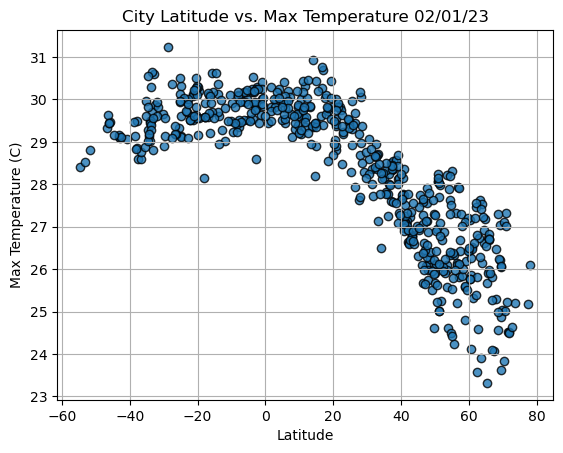

In [61]:
# Build scatter plot for latitude vs. temperature
lat_lvt = city_data_df["Lat"]
maxtemp_lvt = city_data_df["Max Temp"]
humidity_lvt = city_data_df["Humidity"]
cloudiness_lvt = city_data_df["Cloudiness"]
wind_speed_lvt = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(lat_lvt, maxtemp_lvt, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

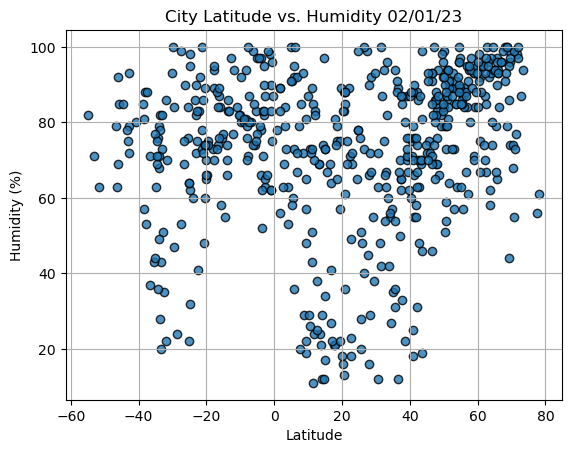

In [52]:
# Build the scatter plots for latitude vs. humidity 

plt.scatter(lat_lvt, humidity_lvt, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

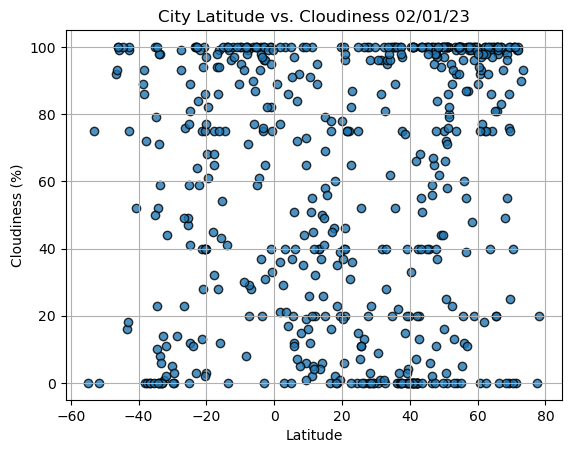

In [53]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat_lvt, cloudiness_lvt, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

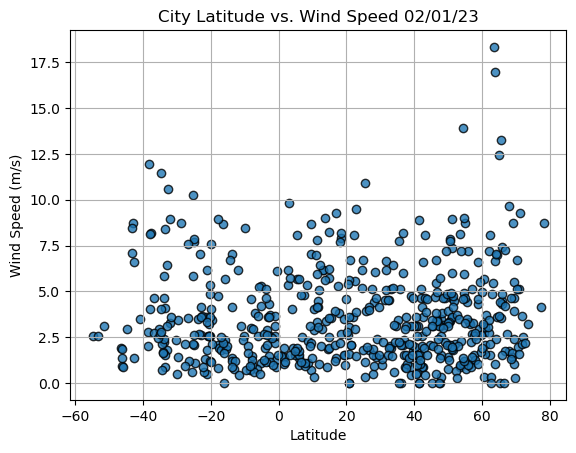

In [54]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(lat_lvt, wind_speed_lvt, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
def plot_lin_reg(x_values, y_values, title, y_label, text_coord):
    slope, intercept, r, p, se = linregress(x_values, y_values)
    regress_val = x_values * slope + intercept
    eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_val,"r")
        
    print(f"The r-value is:", r)
        
    # Annotate the text for the line equation.
    plt.figtext(0.15, 0.83, eq, color="red", size = 14)
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 
  

In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,katsuura,35.1333,140.3000,28.157,35,100,3.45,JP,1675316210
7,nemuro,43.3236,145.5750,26.796,69,55,8.06,JP,1675316211
9,kapaa,22.0752,-159.3190,29.814,89,75,3.60,US,1675316212
10,vestmannaeyjar,63.4427,-20.2734,27.629,92,100,18.34,IS,1675316212
12,tevriz,57.5090,72.4042,26.438,94,99,1.55,RU,1675316213


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,29.107,79,75,8.75,AU,1675316209
1,huarmey,-10.0681,-78.1522,29.483,82,100,2.56,PE,1675316209
3,charlestown,-32.9500,151.6667,30.603,51,14,1.79,AU,1675315977
4,bluff,-46.6000,168.3333,29.317,79,92,1.89,NZ,1675316210
5,port elizabeth,-33.9180,25.5701,29.499,79,0,2.24,ZA,1675316211


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8707182032271369


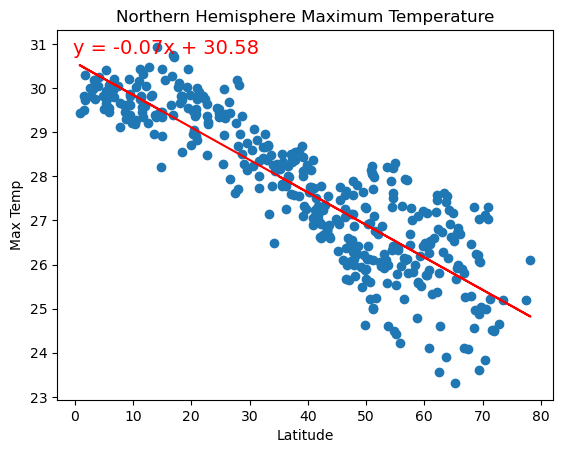

In [58]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_lin_reg(x_values,y_values, "Northern Hemisphere Maximum Temperature" ,'Max Temp',(20,50))

The r-value is: 0.4226140080868984


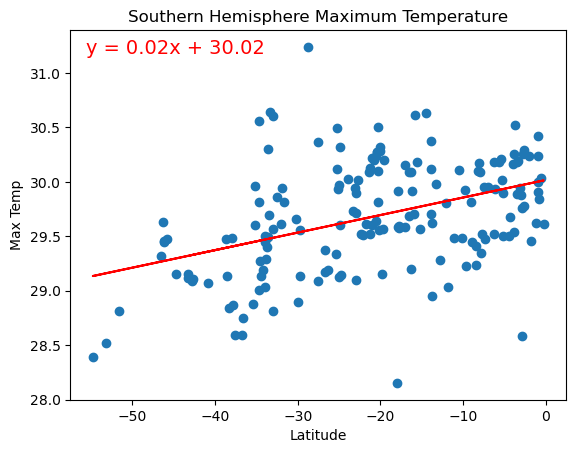

In [59]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_lin_reg(x_values,y_values,'Southern Hemisphere Maximum Temperature','Max Temp',(-50,90))

**Discussion about the linear relationship:** The northern hemisphere shows a negative linear regression of maximum temperature with an increase in latitude. The southern hemisphere shows a slightly positive linear regression where the maximum temperature increases as the latitude increases. In simple terms, the maximum temperature increases the more you move up the southern hemisphere and decreases the more you move up the northern hemisphere. Based on this relatioship it can be assumed that the maximum temperature increases the closer you move to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4267774071271896


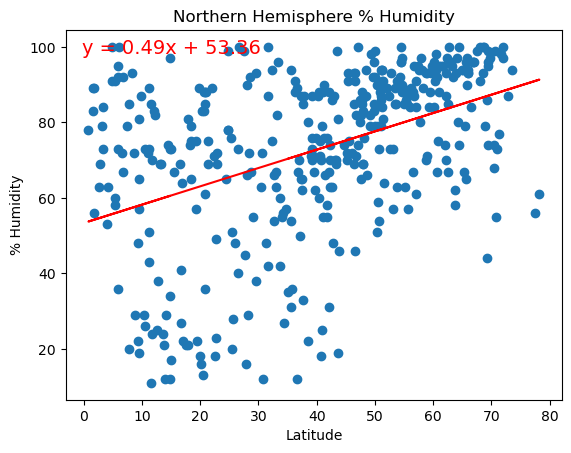

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_lin_reg(x_values,y_values,'Northern Hemisphere % Humidity','% Humidity',(20,50))

The r-value is: 0.27954554325747194


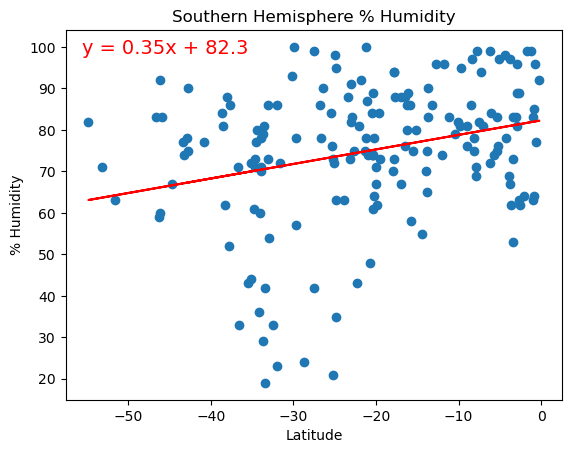

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_lin_reg(x_values,y_values,'Southern Hemisphere % Humidity','% Humidity',(20,50))

**Discussion about the linear relationship:** Both the northern and southern hemispheres have an increase in humidity with an increase in latitude. This relationship demonstrates that as you travel north, the climate becomes more humid and vice versa. The northern hemisphere graph has a denser distribution of data indicating that there are more areas representing higher percentages of humidity in the northern hemisphere than the south. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3158828773270599


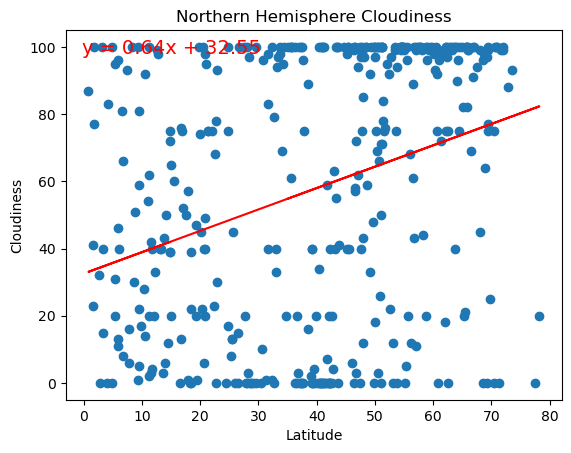

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_lin_reg(x_values,y_values,'Northern Hemisphere Cloudiness','Cloudiness',(20,50))

The r-value is: 0.29571254969370325


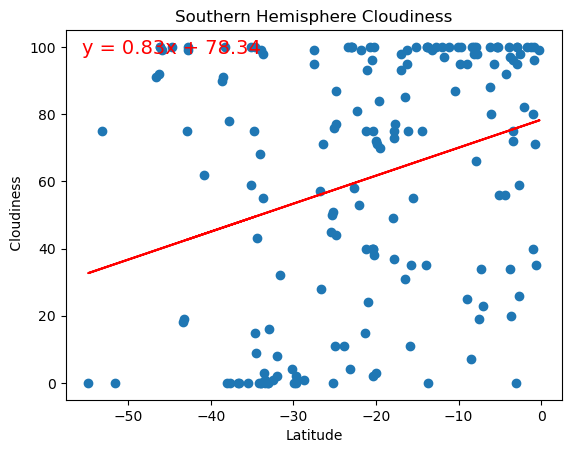

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_lin_reg(x_values,y_values,'Southern Hemisphere Cloudiness',' Cloudiness',(20,50))

**Discussion about the linear relationship:** The northern hemisphere plot has a deser distribution of data indicating that there are more cloudy areas in the north than in the south. Both plots show a positive linear regression of cloudiness with an increase in latitude. Since the northern hemipshere plot is denser than the southern, this leads me to believe that the general cloudiness of an area increases with an increase in latitude until you reach the northen hemisphere then remains relatively equal until you reach the north pole.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0681003181641833


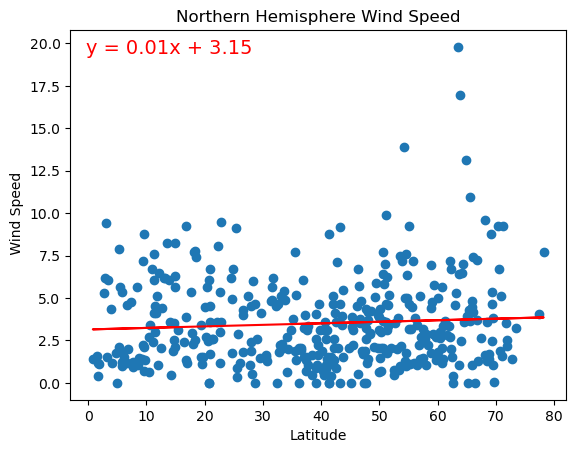

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_lin_reg(x_values,y_values,'Northern Hemisphere Wind Speed',' Wind Speed',(20,50))

The r-value is: -0.22938497404349878


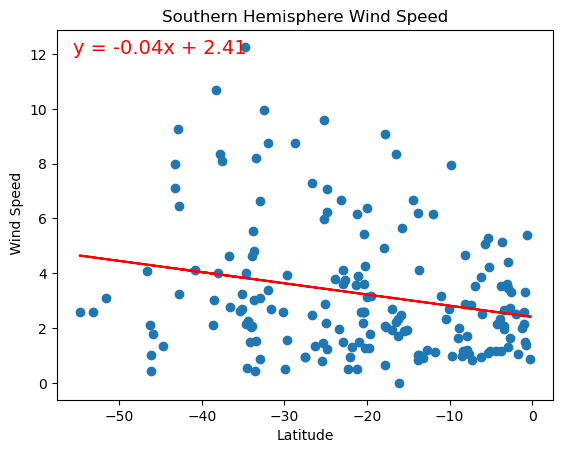

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_lin_reg(x_values,y_values,'Southern Hemisphere Wind Speed',' Wind Speed',(20,50))

**Discussion about the linear relationship:** The northern hemisphere has a slightly positive linear regression while the southern has a negative linear regression. Once again, the northern hemisphere has a denser distribution of data indicating a more windy climate in the northern parts of the worls. As you increase in latitude from the equator windiness stays relatively the same, but as you decrease in latitude from the equator, wind speed varies a little more. The windiest climates are closer to the bottom of the earth. 